In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
train = pd.read_csv('train_set.csv',header=None)
test = pd.read_csv('test_set.csv',header=None)

In [3]:
X_train = np.array(train.loc[:,:24])
t_train = np.array(train.loc[:,25])

X_test = np.array(test)

In [4]:
X_train_scaled =  -1 + (X_train-X_train.min(axis=0)) / ((X_train.max(axis=0) - X_train.min(axis=0))/2)
X_test_scaled =  -1 + (X_test-X_test.min(axis=0)) / ((X_test.max(axis=0) - X_test.min(axis=0))/2)

In [7]:
params = [{'kernel': ['rbf'], 'gamma': [10,5,1,0.5,0.1,0.01],'C': [1,10,50]}]
clf = GridSearchCV(SVC(), params, cv=5, n_jobs=-1, verbose=1, return_train_score=True)
clf.fit(X_train_scaled,t_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  8.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [10, 5, 1, 0.5, 0.1, 0.01], 'C': [1, 10, 50]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

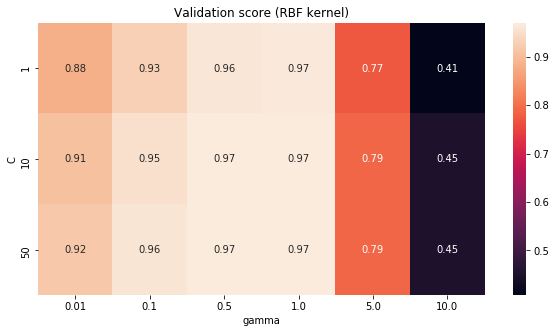

In [8]:
scores = pd.DataFrame(clf.cv_results_)[['param_C','param_gamma','mean_test_score']]
scores = scores.sort_values(by='mean_test_score',ascending=False)
scores.columns = ['C','gamma','mean_test_score']
pivot = scores.pivot(index='C',columns='gamma',values='mean_test_score')
plt.figure(figsize=(10,5))
plt.title('Validation score (RBF kernel)')
sns.heatmap(pivot,annot=True)
plt.savefig('p2'+'_'+'rbf_val.png')

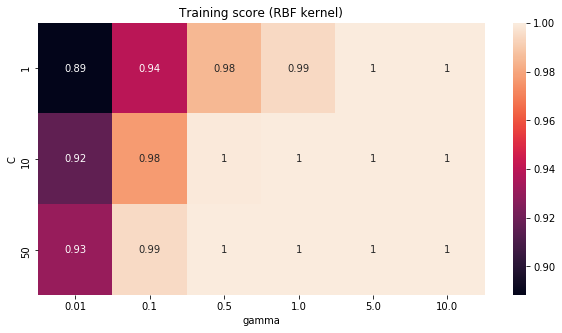

In [9]:
scores = pd.DataFrame(clf.cv_results_)[['param_C','param_gamma','mean_train_score']]
scores = scores.sort_values(by='mean_train_score',ascending=False)
scores.columns = ['C','gamma','mean_train_score']
pivot = scores.pivot(index='C',columns='gamma',values='mean_train_score')
plt.figure(figsize=(10,5))
plt.title('Training score (RBF kernel)')
sns.heatmap(pivot,annot=True)
plt.savefig('p2'+'_'+'rbf_train.png')

In [10]:
print('rbf')
print(clf.best_score_)
print(clf.best_params_)

rbf
0.97
{'C': 50, 'gamma': 1, 'kernel': 'rbf'}


In [29]:
params = [
            {'kernel': ['linear'],'C': [0.1,1,10,100]},
            #{'kernel': ['poly'], 'gamma': [1e1,1e0,1e-1,1e-2,1e-3],'C': [0.1,1,10,100]}
         ]
clf = GridSearchCV(SVC(), params, cv=5, n_jobs=-1, verbose=1, return_train_score=True)
clf.fit(X_train_scaled,t_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   34.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['linear'], 'C': [0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [30]:
print('linear')
print(clf.best_score_)
print(clf.best_params_)

linear
0.9076
{'C': 1, 'kernel': 'linear'}


In [33]:
params = [{'kernel': ['poly'], 'gamma': [1e0,1e-1,1e-2],'C': [1,10,100], 'degree':[2,3,4], 'coef0':[0,10]}]
clf = GridSearchCV(SVC(), params, cv=5, n_jobs=-1, verbose=1, return_train_score=True)
clf.fit(X_train_scaled,t_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 11.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['poly'], 'gamma': [1.0, 0.1, 0.01], 'C': [1, 10, 100], 'degree': [2, 3, 4], 'coef0': [0, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [34]:
print('polynomial')
print(clf.best_score_)
print(clf.best_params_)

polynomial
0.9667
{'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}


In [35]:
params = [{'kernel': ['poly'], 'gamma': [1e0,1e-1,1e-2],'C': [10,100,500,1000], 'degree':[3], 'coef0':[0]}]
clf = GridSearchCV(SVC(), params, cv=5, n_jobs=-1, verbose=1, return_train_score=True)
clf.fit(X_train_scaled,t_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['poly'], 'gamma': [1.0, 0.1, 0.01], 'C': [10, 100, 500, 1000], 'degree': [3], 'coef0': [0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [36]:
print('polynomial')
print(clf.best_score_)
print(clf.best_params_)

polynomial
0.9667
{'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}


In [37]:
s = SVC(kernel='poly',gamma=0.1,C=100,coef0=0,degree=3)
s.fit(X_train_scaled,t_train)
#s.score(X_train_scaled,t_train)

0.9908

In [38]:
predictions = pd.DataFrame()
predictions['id'] = np.arange(0,2000)
predictions['class'] = s.predict(X_test_scaled)

In [39]:
predictions.to_csv('submission.csv',index=False)